<h2 style="color:#00aaa3; font-family: 'Impact'; text-align: center; font-size: 36px;">
🫀 Heart Attack Scoring 🫀
</h2>

**Maqueta aplicación: appheartattack-hsp7zc4eqdkqzecy9ga2ez.streamlit.app**

(Se trata de una aplicación que ejemplifica la capacidad del modelo a nivel de negocio)

# ⚙️ SET UP

## IMPORTAR PAQUETES

In [4]:
import os
import numpy as np
import pandas as pd

#Automcompletar rápido
%config IPCompleter.greedy=True

## CREAR EL DIRECTORIO DEL PROYECTO

In [3]:
import os

path = 'C:/Users/Ricardo/Desktop/Portfolio/Heart'

try:
    os.mkdir(path)
    print("Se ha creado satisfactoriamente el directorio %s" % path)
except OSError as e:
    print(f"No se pudo crear el directorio {path}: {e}")

try:
    os.mkdir(path + '/01_Documentos')
    os.mkdir(path + '/02_Datos')
    os.mkdir(path + '/02_Datos/01_Originales')
    os.mkdir(path + '/02_Datos/02_Validacion')
    os.mkdir(path + '/02_Datos/03_Trabajo')
    os.mkdir(path + '/02_Datos/04_Caches')
    os.mkdir(path + '/03_Notebooks')
    os.mkdir(path + '/03_Notebooks/01_Funciones')
    os.mkdir(path + '/03_Notebooks/02_Desarrollo')
    os.mkdir(path + '/03_Notebooks/03_Sistema')
    os.mkdir(path + '/04_Modelos')
    os.mkdir(path + '/05_Resultados')
    os.mkdir(path + '/09_Otros')
    print("Se han creado satisfactoriamente los subdirectorios")
except OSError as e:
    print(f"No se pudo crear uno o más subdirectorios: {e}")


No se pudo crear el directorio C:/Users/Ricardo/Desktop/Portfolio/Heart: [WinError 183] No se puede crear un archivo que ya existe: 'C:/Users/Ricardo/Desktop/Portfolio/Heart'
No se pudo crear uno o más subdirectorios: [WinError 183] No se puede crear un archivo que ya existe: 'C:/Users/Ricardo/Desktop/Portfolio/Heart/01_Documentos'


### Situar el directorio de trabajo en el proyecto

In [4]:
os.chdir(path)

## CREAR LOS DATASETS INICIALES

### Importar los datos

In [16]:
datos = pd.read_csv('C:/Users/Ricardo/Desktop/Portfolio/Heart/02_Datos/01_Originales/heart.csv')#,index_col=0)
datos

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### Extraer y reservar el dataset de validación

In [30]:
val= datos.sample(frac = 0.3)

In [31]:
val.to_csv('C:/Users/Ricardo/Desktop/Portfolio/Heart/02_Datos/02_Validacion/validacion.csv')

In [39]:
val.shape

(91, 14)

### Extraer y guardar el dataset de trabajo

In [33]:
trabajo = datos.loc[~datos.index.isin(val.index)]

In [34]:
trabajo.to_csv('C:/Users/Ricardo/Desktop/Portfolio/Heart/02_Datos/03_Trabajo/trabajo.csv')

In [40]:
trabajo.shape

(212, 14)

# 📝 CALIDAD DE DATOS

## IMPORTAR PAQUETES

In [1]:
import numpy as np
import pandas as pd
from janitor import clean_names

#Automcompletar rápido
%config IPCompleter.greedy=True

## IMPORTAR LOS DATOS

In [5]:
ruta_proyecto = 'C:/Users/Ricardo/Desktop/Portfolio/Heart'
nombre_fichero_datos = 'trabajo.csv'
ruta_completa = ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_fichero_datos

df = pd.read_csv(ruta_completa,index_col=0)
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0


## CORRECCIÓN DE NOMBRES DE VARIABLES

### Corrección automática

In [5]:
df = clean_names(df)
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0


### Corrección manual

In [7]:
df.rename(columns = {'cp':'chess_pain'
                    ,'trtbps':'blood_pressure'
                    ,'chol':'cholestoral'
                    ,'fbs':'fasting_blood_sugar'
                    ,'restecg':'electro_results'
                    ,'thalachh':'maximum_heart_rate'
                    ,'exng':'angina_induced'
                    ,'caa':'number_major_vessels'
                    }, inplace=True)
df

,age,sex,chess_pain,blood_pressure,cholestoral,fasting_blood_sugar,electro_results,maximum_heart_rate,angina_induced,oldpeak,slp,number_major_vessels,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0


## VISIÓN GENERAL

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212 entries, 0 to 300
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   212 non-null    int64  
 1   sex                   212 non-null    int64  
 2   chess_pain            212 non-null    int64  
 3   blood_pressure        212 non-null    int64  
 4   cholestoral           212 non-null    int64  
 5   fasting_blood_sugar   212 non-null    int64  
 6   electro_results       212 non-null    int64  
 7   maximum_heart_rate    212 non-null    int64  
 8   angina_induced        212 non-null    int64  
 9   oldpeak               212 non-null    float64
 10  slp                   212 non-null    int64  
 11  number_major_vessels  212 non-null    int64  
 12  thall                 212 non-null    int64  
 13  output                212 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 24.8 KB


## TIPOS DE DATOS

In [9]:
df.dtypes

age                       int64
sex                       int64
chess_pain                int64
blood_pressure            int64
cholestoral               int64
fasting_blood_sugar       int64
electro_results           int64
maximum_heart_rate        int64
angina_induced            int64
oldpeak                 float64
slp                       int64
number_major_vessels      int64
thall                     int64
output                    int64
dtype: object

## VALORES ÚNICOS

### Identificación

In [10]:
df.nunique().sort_values()

sex                       2
fasting_blood_sugar       2
angina_induced            2
output                    2
electro_results           3
slp                       3
chess_pain                4
thall                     4
number_major_vessels      5
oldpeak                  38
age                      40
blood_pressure           45
maximum_heart_rate       79
cholestoral             126
dtype: int64

## DUPLICADOS

### Identificación

In [11]:
df.duplicated().sum()

1

### Corrección

In [12]:
df.drop_duplicates(inplace = True)

## GESTIÓN DE NUMÉRICAS

### Nulos

#### Identificación

In [15]:
num.isna().sum().sort_values(ascending = False)

age                     0
sex                     0
chess_pain              0
blood_pressure          0
cholestoral             0
fasting_blood_sugar     0
electro_results         0
maximum_heart_rate      0
angina_induced          0
oldpeak                 0
slp                     0
number_major_vessels    0
thall                   0
output                  0
dtype: int64

### Atípicos

#### Por desviación típica

###### Definir el número de desviaciones típicas

In [31]:
num_desv_tip = 3

###### Función que devuelve los índices de los atípicos

In [32]:
def atipicos_desv_tip(variable, num_desv_tip = 3):
    #sacamos los nulos por ahora
    variable = variable.dropna()
    #calculamos los límites
    media = np.mean(variable)
    sd = np.std(variable)
    umbral = sd * num_desv_tip
    lim_inf = media - umbral
    lim_sup = media + umbral
    #encontramos los índices de los que están fuera de los límites
    indices = [indice for indice,valor in variable.items() if valor < lim_inf or valor > lim_sup]
    return(indices)

###### Función que cuenta el número de atípicos

In [33]:
def conteo_atipicos(df,variable, num_desv_tip = 3):
    atipicos = atipicos_desv_tip(df[variable], num_desv_tip)
    return(df.loc[atipicos,variable].value_counts())

###### Variables a aplicar

In [34]:
df.columns

Index(['age', 'sex', 'chess_pain', 'blood_pressure', 'cholestoral',
       'fasting_blood_sugar', 'electro_results', 'maximum_heart_rate',
       'angina_induced', 'oldpeak', 'slp', 'number_major_vessels', 'thall',
       'output'],
      dtype='object')

In [35]:
var_atipicos_dt = ['electro_results', 'maximum_heart_rate',
       'angina_induced', 'oldpeak', 'slp', 'number_major_vessels', 'thall']

###### Aplicar

In [36]:
for variable in var_atipicos_dt:
    print('\n' + variable + ':\n')
    print(conteo_atipicos(num,variable,num_desv_tip))


electro_results:

Series([], Name: electro_results, dtype: int64)

maximum_heart_rate:

71    1
Name: maximum_heart_rate, dtype: int64

angina_induced:

Series([], Name: angina_induced, dtype: int64)

oldpeak:

5.6    1
Name: oldpeak, dtype: int64

slp:

Series([], Name: slp, dtype: int64)

number_major_vessels:

4    3
Name: number_major_vessels, dtype: int64

thall:

0    2
Name: thall, dtype: int64


In [ ]:
#Vamos a ver estas variables por el metodo de colas por revisarlas.

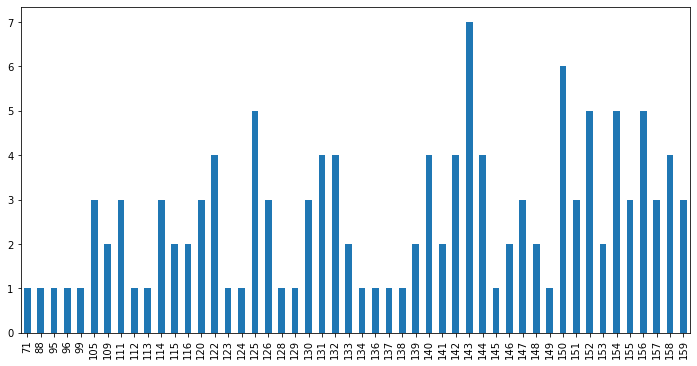

In [38]:
 df.maximum_heart_rate.value_counts().sort_index().head(50).plot(kind = 'bar', figsize = (12,6));

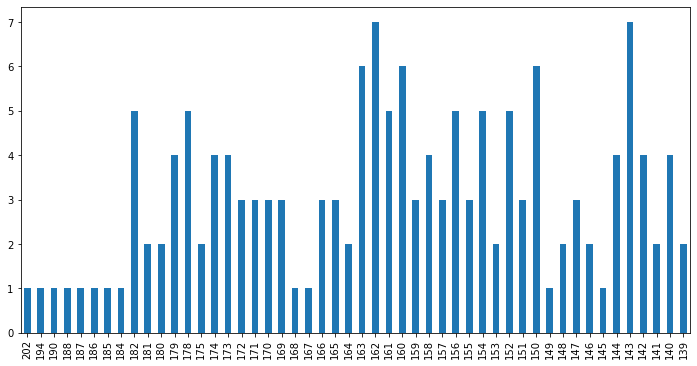

In [39]:
 df.maximum_heart_rate.value_counts().sort_index(ascending=False).head(50).plot(kind = 'bar', figsize = (12,6));

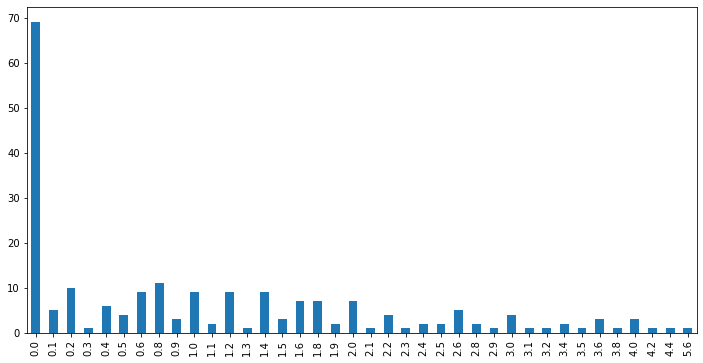

In [41]:
df.oldpeak.value_counts().sort_index().head(50).plot(kind = 'bar',figsize = (12,6));

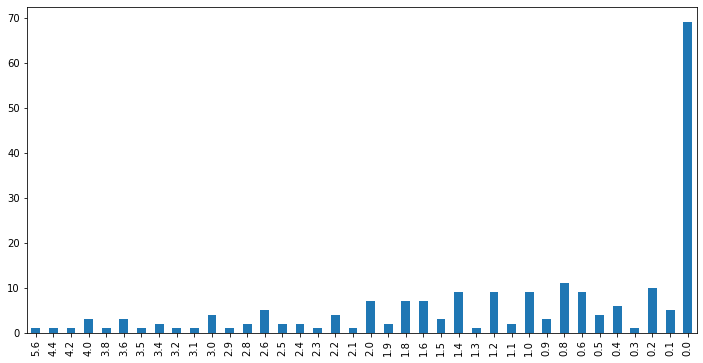

In [42]:
df.oldpeak.value_counts().sort_index(ascending = False).head(50).plot(kind = 'bar',figsize = (12,6));

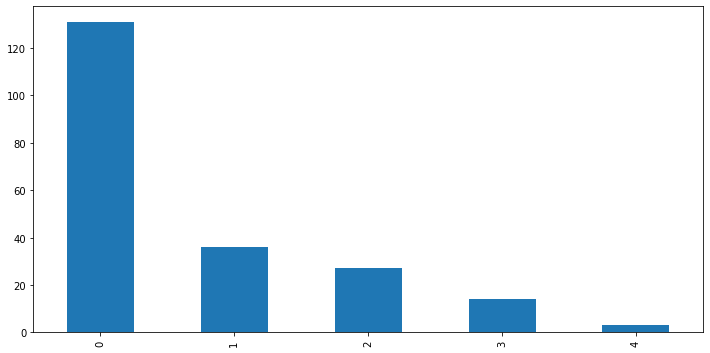

In [43]:
df.number_major_vessels.value_counts().sort_index(ascending = True).head(50).plot(kind = 'bar',figsize = (12,6));

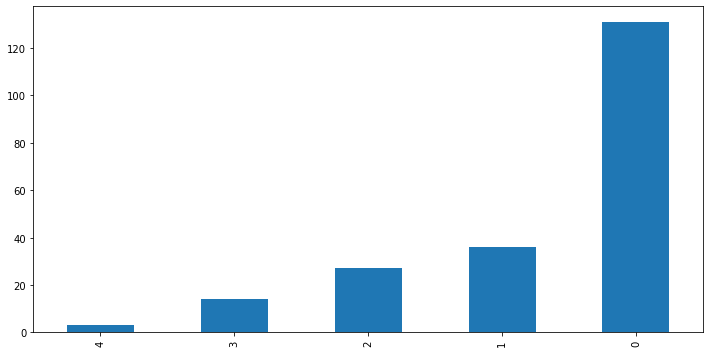

In [44]:
df.number_major_vessels.value_counts().sort_index(ascending = False).head(50).plot(kind = 'bar',figsize = (12,6));

In [48]:
df.number_major_vessels.value_counts().sort_index(ascending = False)

4      3
3     14
2     27
1     36
0    131
Name: number_major_vessels, dtype: int64

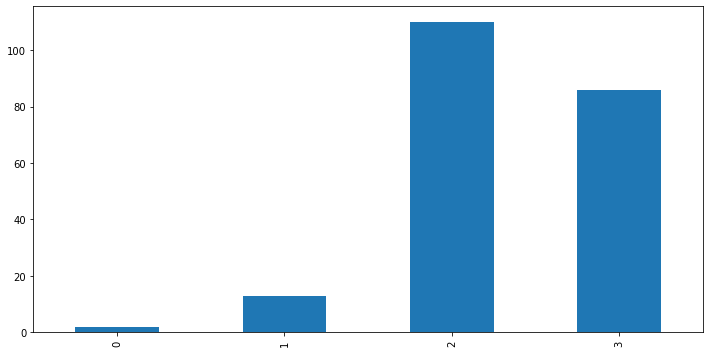

In [45]:
df.thall.value_counts().sort_index(ascending = True).head(50).plot(kind = 'bar',figsize = (12,6));

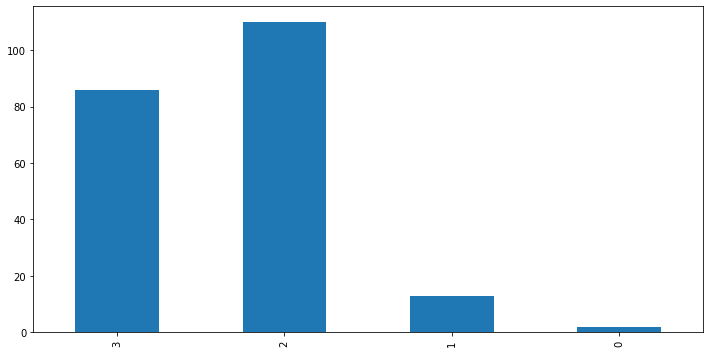

In [46]:
df.thall.value_counts().sort_index(ascending = False).head(50).plot(kind = 'bar',figsize = (12,6));

In [47]:
df.thall.value_counts().sort_index(ascending = False)

3     86
2    110
1     13
0      2
Name: thall, dtype: int64

In [ ]:
#vamos a winsorizart manualmente las variables thall y number_major_vessels

#### Por winsorización manual para una variable

##### Identificación

###### Variable a analizar

In [29]:
variable =  'thall'


###### Comprobar el mínimo y máximo actual

In [50]:
df[variable].describe().loc[['min','max']]

min    0.0
max    3.0
Name: thall, dtype: float64

##### Corrección

###### Definir el mínimo y máximo tolerable.

In [52]:
minimo = 1
maximo = 3

###### Aplicar

In [53]:
df[variable].clip(minimo,maximo, inplace=True)

In [54]:
df['number_major_vessels'].clip(0,3,inplace = True)

In [58]:
df.number_major_vessels.value_counts()

0    131
1     36
2     27
3     17
Name: number_major_vessels, dtype: int64

## GUARDAR DATASETS TRAS CALIDAD DE DATOS

In [59]:
ruta_trabajo = ruta_proyecto + '/02_Datos/03_Trabajo/' + 'trabajo_resultado_calidad.pickle'
df.to_pickle(ruta_trabajo)

# 🔬 EDA

## IMPORTAR PAQUETES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#Automcompletar rápido
%config IPCompleter.greedy=True

## IMPORTAR LOS DATOS

In [2]:
ruta_proyecto = 'C:/Users/Ricardo/Desktop/Portfolio/Heart'

In [5]:
nombre_df = 'trabajo_resultado_calidad.pickle'

In [6]:
df = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_df)

In [7]:
df

,age,sex,chess_pain,blood_pressure,cholestoral,fasting_blood_sugar,electro_results,maximum_heart_rate,angina_induced,oldpeak,slp,number_major_vessels,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0


### Análisis estadístico

In [5]:
def frecuencias_cat(df_cat):
    resultado = df_cat.apply(lambda x: x.value_counts(normalize = True)).T.stack()\
                .to_frame().reset_index()\
                .rename(columns={'level_0':'Variable','level_1':'Valor',0: "Frecuencia"})\
                .sort_values(by = ['Variable','Frecuencia'])
    return(resultado)

In [6]:
frecuencias_cat(cat)

,Variable,Valor,Frecuencia
31,consumo,unknown,0.024717
32,consumo,yes,0.151662
30,consumo,no,0.823621
12,estado_civil,OTROS,0.001862
13,estado_civil,divorced,0.110399
15,estado_civil,single,0.280418
14,estado_civil,married,0.607322
20,formacion,illiterate,0.000465
23,formacion,unknown,0.037075
17,formacion,basic.6y,0.048917


### Análisis gráfico

In [7]:
def graficos_eda_categoricos(cat):
    
    #Calculamos el número de filas que necesitamos
    from math import ceil
    filas = ceil(cat.shape[1] / 2)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat 

    #Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)

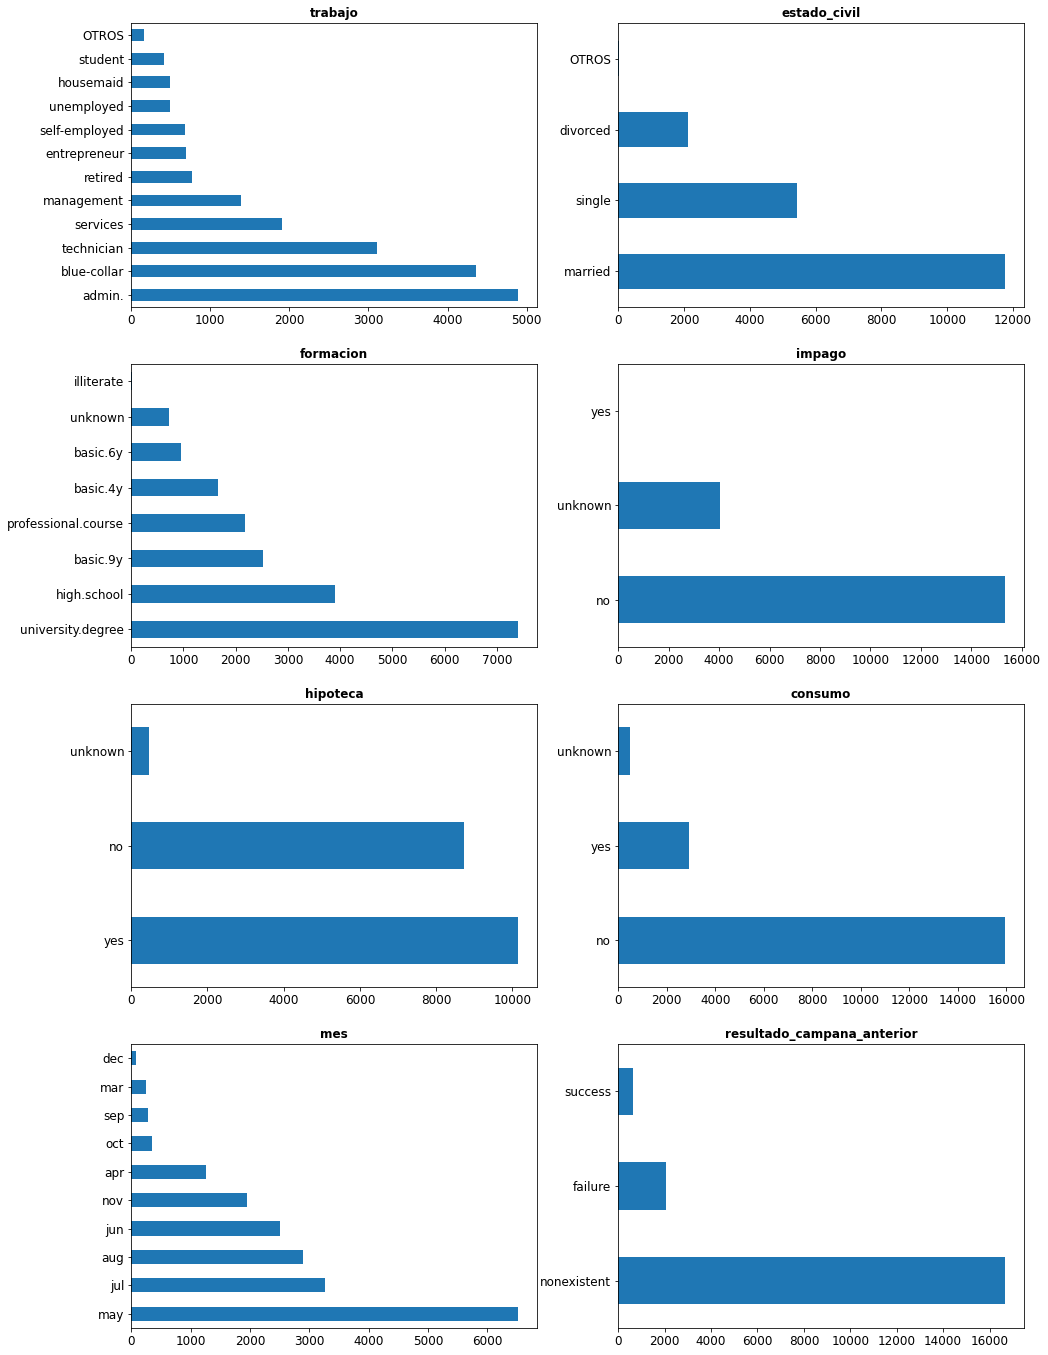

In [8]:
graficos_eda_categoricos(cat)

## EDA NUMÉRICAS

### Análisis estadístico

In [8]:
def estadisticos_cont(df):
    #Calculamos describe
    estadisticos = df.describe().T
    #Añadimos la mediana
    estadisticos['median'] = df.median()
    #Reordenamos para que la mediana esté al lado de la media
    estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7]]
    #Lo devolvemos
    return(estadisticos)

In [9]:
estadisticos_cont(df)

,count,mean,median,std,min,25%,50%,75%,max
age,211.0,54.028436,55.0,9.337541,29.0,47.0,55.0,60.0,77.0
sex,211.0,0.720379,1.0,0.449880,0.0,0.0,1.0,1.0,1.0
chess_pain,211.0,0.947867,1.0,1.033778,0.0,0.0,1.0,2.0,3.0
blood_pressure,211.0,131.218009,130.0,17.155864,94.0,120.0,130.0,140.0,200.0
cholestoral,211.0,249.052133,243.0,54.163967,126.0,214.0,243.0,278.5,564.0
fasting_blood_sugar,211.0,0.151659,0.0,0.359543,0.0,0.0,0.0,0.0,1.0
electro_results,211.0,0.554502,1.0,0.526096,0.0,0.0,1.0,1.0,2.0
maximum_heart_rate,211.0,149.881517,153.0,22.919116,71.0,133.0,153.0,165.5,202.0
angina_induced,211.0,0.331754,0.0,0.471963,0.0,0.0,0.0,1.0,1.0
oldpeak,211.0,1.042654,0.8,1.162870,0.0,0.0,0.8,1.7,5.6


### Análisis gráfico

In [10]:
def graficos_eda_continuas(df):
    
    #Calculamos el número de fila que necesitamos
    from math import ceil
    filas = ceil(df.shape[1] / 2)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat 

    #Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(df):
        df[variable].plot.density(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)

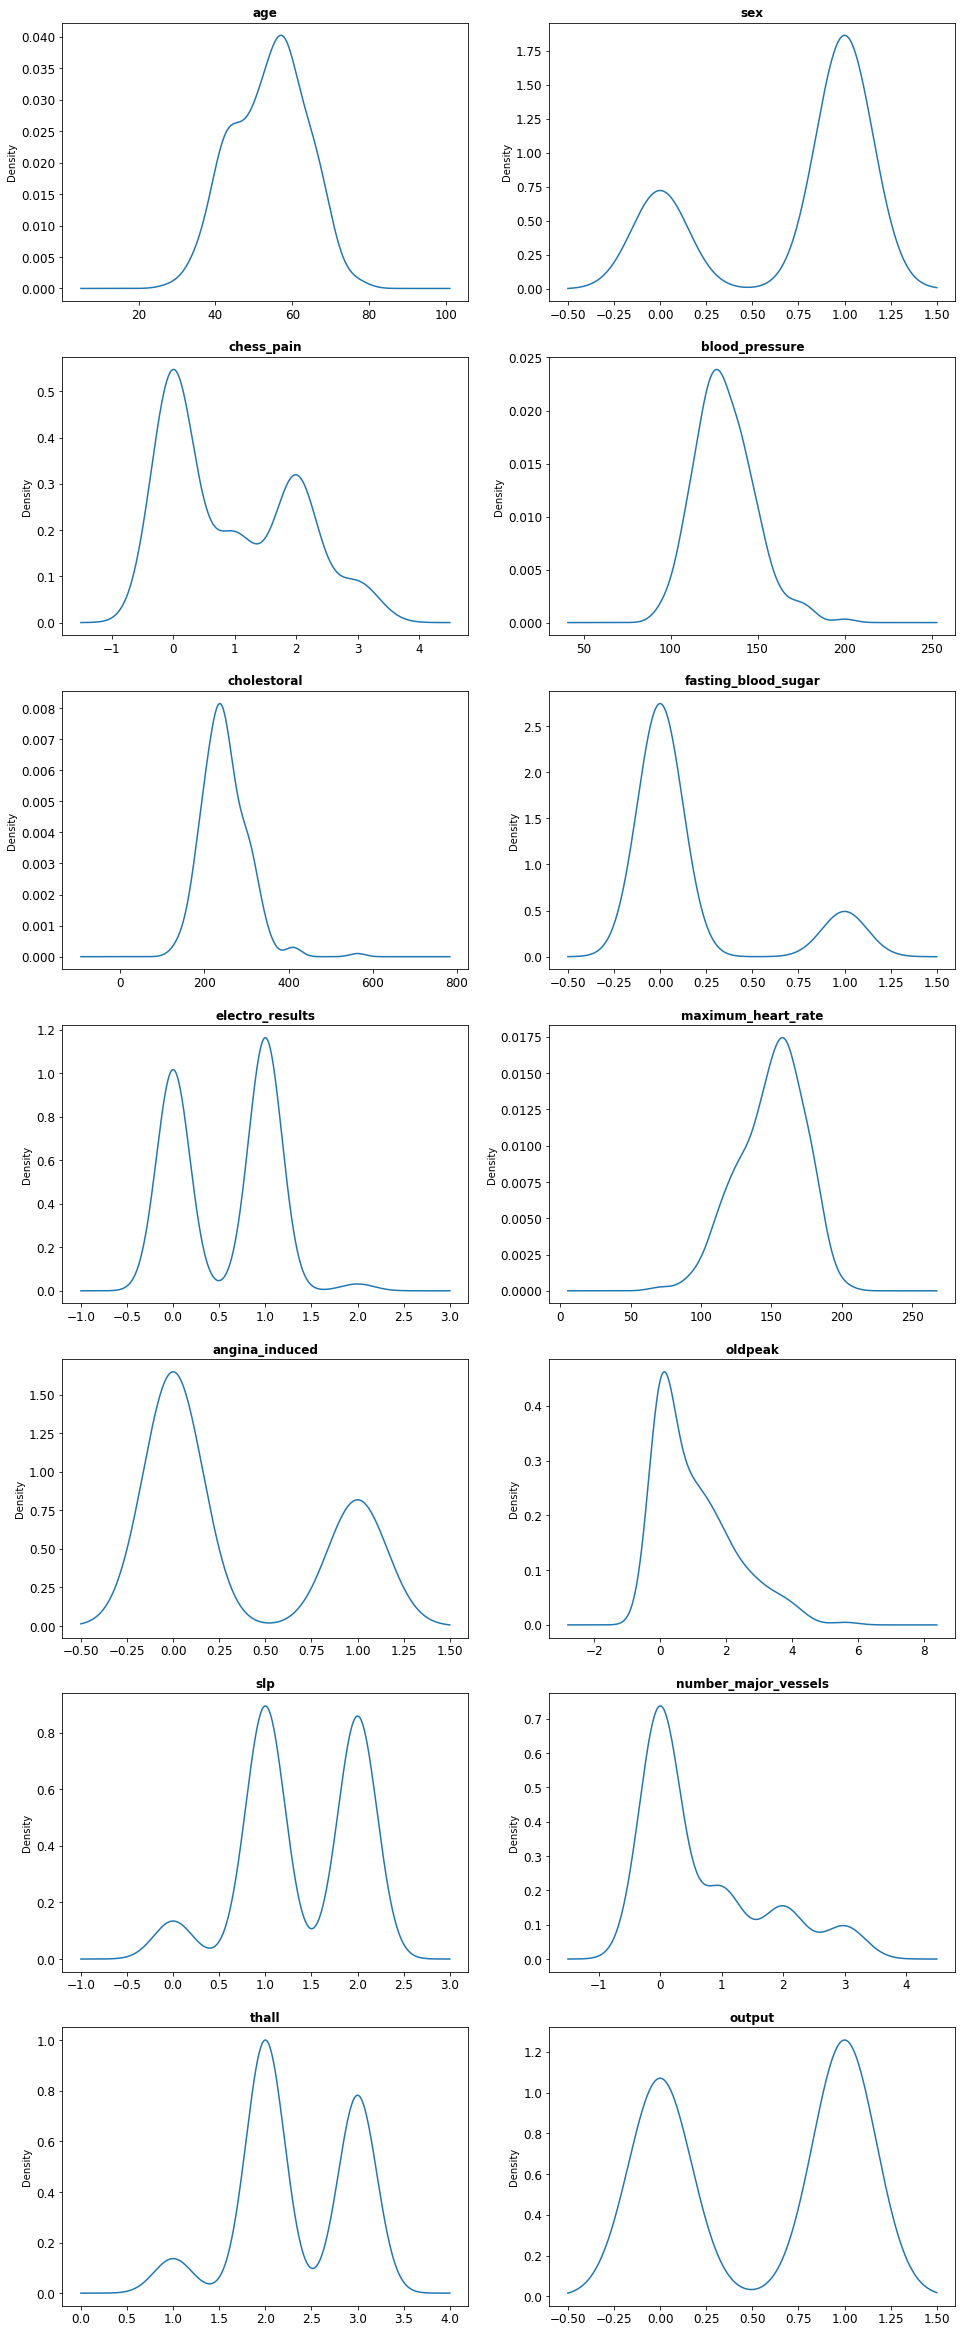

In [11]:
graficos_eda_continuas(df)

## GUARDAR DATASETS TRAS CALIDAD DE DATOS

In [14]:
#Definir los nombres de los archivos
ruta_df = ruta_proyecto + '/02_Datos/03_Trabajo/' + 'df_resultado_eda.pickle'

In [15]:
#Guardar los archivos
df.to_pickle(ruta_df)

# 📊 PRESELECCIÓN DE VARIABLES

## IMPORTAR PAQUETES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import RFE
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.inspection import permutation_importance


#Automcompletar rápido
%config IPCompleter.greedy=True

C:\Users\Ricardo\miniconda3\envs\heart\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


## IMPORTAR LOS DATOS

In [2]:
ruta_proyecto = 'C:/Users/Ricardo/Desktop/Portfolio/Heart'

In [3]:
nombre_df = 'df_resultado_eda.pickle'

In [4]:
df = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_df)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 211 entries, 0 to 300
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   211 non-null    int64  
 1   sex                   211 non-null    int64  
 2   chess_pain            211 non-null    int64  
 3   blood_pressure        211 non-null    int64  
 4   cholestoral           211 non-null    int64  
 5   fasting_blood_sugar   211 non-null    int64  
 6   electro_results       211 non-null    int64  
 7   maximum_heart_rate    211 non-null    int64  
 8   angina_induced        211 non-null    int64  
 9   oldpeak               211 non-null    float64
 10  slp                   211 non-null    int64  
 11  number_major_vessels  211 non-null    int64  
 12  thall                 211 non-null    int64  
 13  output                211 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 24.7 KB


## MÉTODOS SUPERVISADOS

### Preparar x e y

In [7]:
target = 'output'
x = df.drop(columns = target).copy()
y =  df[target].copy()

### Mutual Information

#### Crear una función para mostrar el resultado

In [8]:
def ranking_mi(mutual_selector, modo = 'tabla'):
    #Maqueta el ranking
    ranking_mi = pd.DataFrame(mutual_selector, index = x.columns).reset_index()
    ranking_mi.columns = ['variable','importancia_mi']
    ranking_mi = ranking_mi.sort_values(by = 'importancia_mi', ascending = False)
    ranking_mi['ranking_mi'] = np.arange(0,ranking_mi.shape[0])
    #Muestra la salida
    if modo == 'tabla':
        return(ranking_mi)
    else:
        g = ranking_mi.importancia_mi.sort_values().plot.barh(figsize = (12,20))
        g.set_yticklabels(ranking_mi.sort_values(by = 'importancia_mi').variable)
        return(g)

#### Calcular y revisar

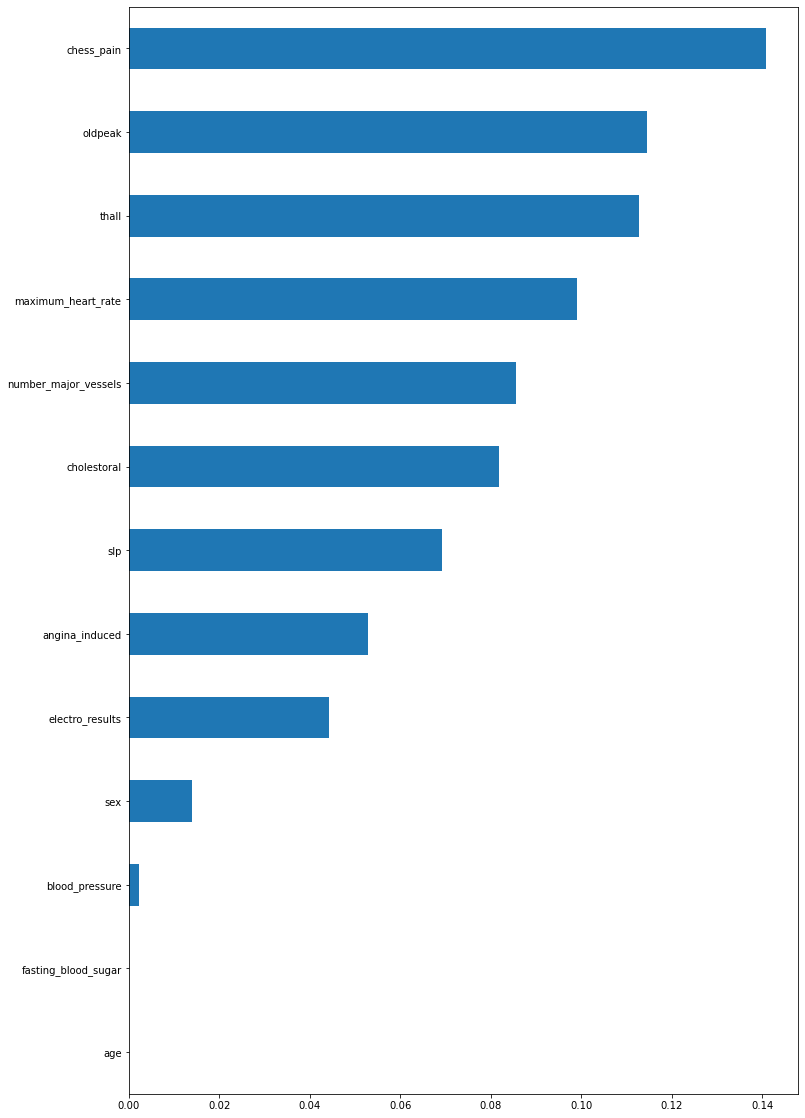

In [9]:
mutual_selector = mutual_info_classif(x,y)

rank_mi = ranking_mi(mutual_selector, modo = 'grafico')

#### Seleccionar las variables que pasan

In [21]:
posicion_variable_limite = 10

##### Extraer los nombres de las que entran

In [22]:
entran_mi = ranking_mi(mutual_selector).iloc[0:posicion_variable_limite].variable

##### Crear el dataframe con la selección

In [23]:
x_mi = x[entran_mi].copy()

### Recursive Feature Elimination

#### Instanciar

In [13]:
rfe = RFE(estimator = XGBClassifier( n_jobs = -1, eval_metric='auc'))

#### Entrenar

In [14]:
rfe.fit(x,y)

C:\Users\Ricardo\miniconda3\envs\heart\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Ricardo\miniconda3\envs\heart\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Ricardo\miniconda3\envs\heart\lib\site-packages\xgboost

RFE(estimator=XGBClassifier(base_score=None, booster=None,
                            colsample_bylevel=None, colsample_bynode=None,
                            colsample_bytree=None, enable_categorical=False,
                            eval_metric='auc', gamma=None, gpu_id=None,
                            importance_type=None, interaction_constraints=None,
                            learning_rate=None, max_delta_step=None,
                            max_depth=None, min_child_weight=None, missing=nan,
                            monotone_constraints=None, n_estimators=100,
                            n_jobs=-1, num_parallel_tree=None, predictor=None,
                            random_state=None, reg_alpha=None, reg_lambda=None,
                            scale_pos_weight=None, subsample=None,
                            tree_method=None, validate_parameters=None,
                            verbosity=None))

##### Extraer los nombres de las que entran

In [15]:
entran_rfe = x.columns[rfe.support_]

In [16]:
entran_rfe

Index(['sex', 'chess_pain', 'angina_induced', 'oldpeak',
       'number_major_vessels', 'thall'],
      dtype='object')

#### Crear el dataframe con la selección

In [17]:
x_rfe = x[entran_rfe].copy()

### Permutation Importance

#### Crear una función para mostrar el resultado

In [18]:
def ranking_per(predictoras,permutacion):
    ranking_per = pd.DataFrame({'variable': predictoras.columns, 'importancia_per': permutacion.importances_mean}).sort_values(by = 'importancia_per', ascending = False)
    ranking_per['ranking_per'] = np.arange(0,ranking_per.shape[0])
    return(ranking_per)

#### Instanciar y entrenar

In [19]:
import warnings
warnings.filterwarnings(action="ignore", message=r'.*Use subset.*of np.ndarray is not recommended')

xgb = XGBClassifier(n_jobs = -1, eval_metric='auc')

xgb.fit(x,y)

permutacion = permutation_importance(xgb, 
                                     x, y, 
                                     scoring = 'roc_auc',
                                     n_repeats=5, n_jobs = -1)

C:\Users\Ricardo\miniconda3\envs\heart\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Ricardo\miniconda3\envs\heart\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


#### Revisar la salida

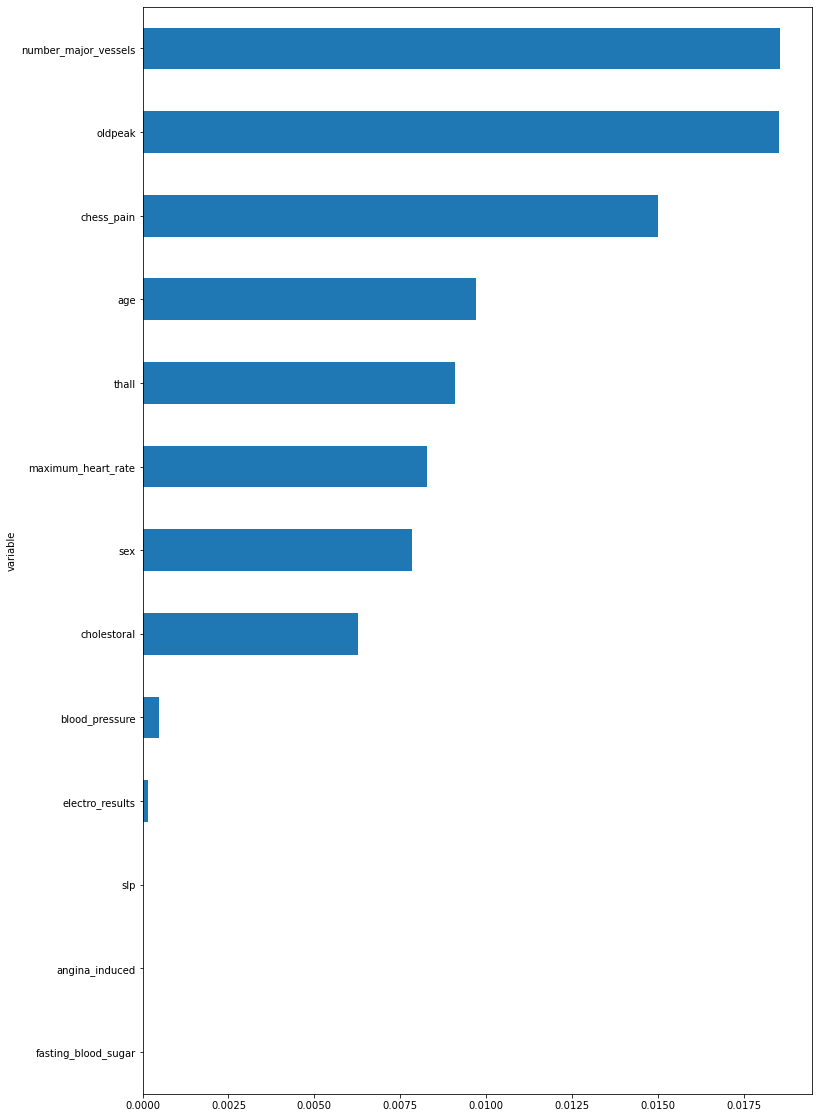

In [20]:
rank_per = ranking_per(x,permutacion)

rank_per.set_index('variable').importancia_per.sort_values().plot.barh(figsize = (12,20));

#### Seleccionar las variables que pasan

##### Definir la posición de la última variable que va a entrar

In [24]:
posicion_variable_limite = 8

##### Extraer los nombres de las que entran

In [25]:
entran_per = rank_per.iloc[0:posicion_variable_limite].variable

##### Crear el dataframe con la selección

In [26]:
x_per = x[entran_per].copy()

## SELECCIONAR EL MÉTODO FINAL

In [27]:
#x_preseleccionado = x_mi
# x_preseleccionado = x_rfe
x_preseleccionado = x_per

## MÉTODOS NO SUPERVISADOS

### Correlación

#### Crear una función para mostrar el resultado

In [28]:
def correlaciones_fuertes(df, lim_inf = 0.3, lim_sup = 1,drop_dupli=True):
    #Calcula la matriz de correlación
    c = df.corr().abs()
    #Lo pasa todo a filas
    c= c.unstack()
    #Pasa el índice a columnas y le pone nombres
    c = pd.DataFrame(c).reset_index()
    c.columns = ['var1','var2','corr']
    #A dataframe, filtra limites y ordena en descendiente
    c = c.loc[(c['corr'] > lim_inf) &  (c['corr'] < lim_sup),:].sort_values(by = 'corr', ascending=False)
    #Desduplica las correlaciones (o no si drop_dupli es False)
    c = c if drop_dupli == False else c.drop_duplicates(subset = ['corr'])
    #Devuelve la salida
    return(c)

#### Calcular y revisar

##### Calcular

In [29]:
cor_finales = correlaciones_fuertes(x_preseleccionado)

##### Revisar agregado

In [30]:
cor_finales.var1.value_counts()

age                     1
oldpeak                 1
chess_pain              1
number_major_vessels    1
Name: var1, dtype: int64

##### Revisar detalle

In [31]:
cor_finales.head(50)
#No vamos a eliminar ninguna varaible por correlación

,var1,var2,corr
29,age,maximum_heart_rate,0.404308
13,oldpeak,maximum_heart_rate,0.359401
21,chess_pain,maximum_heart_rate,0.322514
3,number_major_vessels,age,0.302040


## GUARDAR DATASETS TRAS PRESELECCION DE VARIABLES

In [32]:
#Definir los nombres de los archivos
nombre_x_preseleccionado = ruta_proyecto + '/02_Datos/03_Trabajo/' + 'x_preseleccionado.pickle'
nombre_y_preseleccionado = ruta_proyecto + '/02_Datos/03_Trabajo/' + 'y_preseleccionado.pickle'

In [33]:
#Guardar los archivos
x_preseleccionado.to_pickle(nombre_x_preseleccionado)

y_preseleccionado = y.copy()
y_preseleccionado.to_pickle(nombre_y_preseleccionado)

In [34]:
#Guardar los nombres de las variables finales
nombre_variables_finales = ruta_proyecto + '/05_Resultados/' + 'variables_finales.pickle'

x_preseleccionado.iloc[0].to_pickle(nombre_variables_finales)

# ⌨️ MODELIZACIÓN PARA CLASIFICACIÓN

## IMPORTAR PAQUETES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.metrics import classification_report

#from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
import scikitplot as skplt
#from yellowbrick.classifier import discrimination_threshold

#Autocompletar rápido
%config IPCompleter.greedy=True

#Desactivar la notación científica
pd.options.display.float_format = '{:.2f}'.format

#Desactivar los warnings
import warnings
warnings.filterwarnings("ignore")

C:\Users\Ricardo\miniconda3\envs\heart\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


## IMPORTAR LOS DATOS

Sustituir la ruta del proyecto.

In [2]:
ruta_proyecto = 'C:/Users/Ricardo/Desktop/Portfolio/Heart'

Nombres de los ficheros de datos.

In [3]:
nombre_x = 'x_preseleccionado.pickle'
nombre_y = 'y_preseleccionado.pickle'

Cargar los datos.

In [7]:
x = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_x)
y = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_y)

## MODELIZAR

### Reservar el dataset de validacion

In [8]:
train_x,val_x,train_y,val_y = train_test_split(x,y,test_size=0.3)

### Crear el pipe y el diccionario de algorimos, parámetros y valores a testar

In [9]:
pipe = Pipeline([('algoritmo',RandomForestClassifier())])

grid = [
        
        {'algoritmo': [RandomForestClassifier()],
         'algoritmo__n_jobs': [-1],
         'algoritmo__max_depth': [5,10,15],
         'algoritmo__n_estimators': [50,100,200]},
        
        {'algoritmo': [XGBClassifier()],
         'algoritmo__n_jobs': [-1],
         'algoritmo__verbosity': [0],#para que no salgan warnings
         'algoritmo__learning_rate': [0.01,0.025,0.05,0.1],
         'algoritmo__max_depth': [5,10,20],
         'algoritmo__reg_alpha': [0,0.1,0.5,1],
         'algoritmo__reg_lambda': [0.01,0.1,1],
         'algoritmo__n_estimators': [100,500,1000]},
        
        {'algoritmo': [HistGradientBoostingClassifier()],
         'algoritmo__learning_rate': [0.01,0.025,0.05,0.1],
         'algoritmo__max_iter': [50,100,200],
         'algoritmo__max_depth': [5,10,20],
         'algoritmo__min_samples_leaf': [500],
         'algoritmo__scoring': ['roc_auc'],
         'algoritmo__l2_regularization': [0,0.25,0.5,0.75,1]}
       ]

### Optimizar los hiper parámetros

####  Con grid search

In [10]:
grid_search = GridSearchCV(estimator= pipe, 
                           param_grid = grid, 
                           cv = 3, 
                           scoring = 'roc_auc',
                           verbose = 0,
                           n_jobs = -1)

modelo = grid_search.fit(train_x,train_y)

pd.DataFrame(grid_search.cv_results_).sort_values(by = 'rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algoritmo,param_algoritmo__max_depth,param_algoritmo__n_estimators,param_algoritmo__n_jobs,param_algoritmo__learning_rate,param_algoritmo__reg_alpha,...,param_algoritmo__max_iter,param_algoritmo__min_samples_leaf,param_algoritmo__scoring,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
437,1.49,0.09,0.01,0.00,"XGBClassifier(base_score=None, booster=None, c...",20,1000,-1,0.10,0.50,...,NaN,NaN,NaN,"{'algoritmo': XGBClassifier(base_score=None, b...",0.93,0.85,0.83,0.87,0.04,1
425,1.71,0.09,0.01,0.00,"XGBClassifier(base_score=None, booster=None, c...",20,500,-1,0.10,0.50,...,NaN,NaN,NaN,"{'algoritmo': XGBClassifier(base_score=None, b...",0.93,0.85,0.83,0.87,0.04,1
389,0.85,0.04,0.01,0.00,"XGBClassifier(base_score=None, booster=None, c...",10,500,-1,0.10,0.50,...,NaN,NaN,NaN,"{'algoritmo': XGBClassifier(base_score=None, b...",0.93,0.85,0.83,0.87,0.04,1
401,1.38,0.05,0.01,0.00,"XGBClassifier(base_score=None, booster=None, c...",10,1000,-1,0.10,0.50,...,NaN,NaN,NaN,"{'algoritmo': XGBClassifier(base_score=None, b...",0.93,0.85,0.83,0.87,0.04,1
317,1.15,0.04,0.01,0.00,"XGBClassifier(base_score=None, booster=None, c...",20,500,-1,0.05,0.50,...,NaN,NaN,NaN,"{'algoritmo': XGBClassifier(base_score=None, b...",0.93,0.85,0.83,0.87,0.04,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.10,0.00,0.03,0.00,HistGradientBoostingClassifier(),20,NaN,NaN,0.05,NaN,...,100,500,roc_auc,{'algoritmo': HistGradientBoostingClassifier()...,0.50,0.50,0.50,0.50,0.00,442
503,0.21,0.00,0.05,0.00,HistGradientBoostingClassifier(),20,NaN,NaN,0.05,NaN,...,200,500,roc_auc,{'algoritmo': HistGradientBoostingClassifier()...,0.50,0.50,0.50,0.50,0.00,442
504,0.05,0.00,0.01,0.00,HistGradientBoostingClassifier(),5,NaN,NaN,0.10,NaN,...,50,500,roc_auc,{'algoritmo': HistGradientBoostingClassifier()...,0.50,0.50,0.50,0.50,0.00,442
506,0.21,0.00,0.05,0.00,HistGradientBoostingClassifier(),5,NaN,NaN,0.10,NaN,...,200,500,roc_auc,{'algoritmo': HistGradientBoostingClassifier()...,0.50,0.50,0.50,0.50,0.00,442


## EVALUAR

### Predecir sobre validación

In [17]:
pred = modelo.best_estimator_.predict_proba(val_x)[:, 1]
pred

array([0.8215678 , 0.05119021, 0.01177961, 0.9731567 , 0.13283092,
       0.97532994, 0.99737597, 0.9971143 , 0.0769209 , 0.9252554 ,
       0.82933104, 0.0823658 , 0.9934736 , 0.96987176, 0.8588009 ,
       0.9901168 , 0.02460176, 0.99111104, 0.00961484, 0.9718484 ,
       0.2152886 , 0.31494507, 0.0251537 , 0.77368903, 0.6658937 ,
       0.9840517 , 0.24505824, 0.08584373, 0.9930848 , 0.16566695,
       0.97135395, 0.9869757 , 0.00366124, 0.9909176 , 0.6242774 ,
       0.00345528, 0.00963244, 0.48842856, 0.07858816, 0.34021348,
       0.76112   , 0.9906529 , 0.4795255 , 0.02417084, 0.03727167,
       0.0081755 , 0.07960058, 0.16842245, 0.00717554, 0.03453674,
       0.21223064, 0.48512232, 0.9920465 , 0.9890458 , 0.97007984,
       0.3511348 , 0.0250013 , 0.01843668, 0.9803601 , 0.9235312 ,
       0.01492138, 0.99314195, 0.9866457 , 0.8869955 ], dtype=float32)

### Evaluar sobre validación

In [12]:
roc_auc_score(val_y, pred)

0.8641251221896382

### Examinar el mejor modelo

In [13]:
modelo.best_estimator_

Pipeline(steps=[('algoritmo',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, enable_categorical=False,
                               gamma=0, gpu_id=-1, importance_type=None,
                               interaction_constraints='', learning_rate=0.1,
                               max_delta_step=0, max_depth=10,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=500,
                               n_jobs=-1, num_parallel_tree=1, predictor='auto',
                               random_state=0, reg_alpha=0.5, reg_lambda=1,
                               scale_pos_weight=1, subsample=1,
                               tree_method='exact', validate_parameters=1,
                               verbosity=0))])

## REPORTING DEL MODELO

### Gain Chart

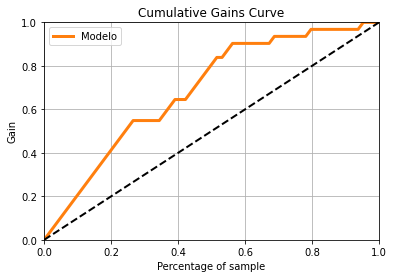

In [14]:
fig, ax = plt.subplots()

skplt.metrics.plot_cumulative_gain(val_y, modelo.best_estimator_.predict_proba(val_x), ax=ax) 

# Eliminamos la línea de los ceros, que internamente tiene etiqueta 'Class 0'
lines = ax.get_lines()
# Buscar por la etiqueta y eliminar la línea correspondiente
for line in lines:
    if line.get_label() == 'Class 0':
        line.remove()

# Personalizamos la leyenda sin incluir la línea de los ceros
plt.legend(labels=['Modelo'])

# Ahora puedes mostrar el gráfico
plt.show()

In [ ]:
#para predecir el 80% de personas con alto riesgo de infarto, me tengo que dirigir unicamente al 50% de los datos de la bbdd.

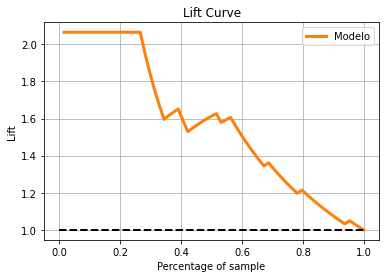

In [15]:
fig, ax = plt.subplots()

skplt.metrics.plot_lift_curve(val_y, modelo.best_estimator_.predict_proba(val_x), ax=ax) 

# Eliminamos la línea de los ceros, que internamente tiene etiqueta 'Class 0'
lines = ax.get_lines()
# Buscar por la etiqueta y eliminar la línea correspondiente
for line in lines:
    if line.get_label() == 'Class 0':
        line.remove()

# Personalizamos la leyenda sin incluir la línea de los ceros
plt.legend(labels=['Modelo'])

# Ahora puedes mostrar el gráfico
plt.show()

### ROC Chart

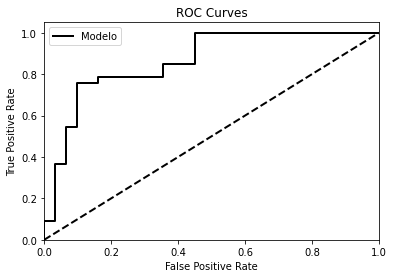

In [16]:
fig, ax = plt.subplots()

# Generamos la gráfica ROC
skplt.metrics.plot_roc(val_y, modelo.best_estimator_.predict_proba(val_x), ax=ax)

# Obtenemos todas las líneas y las leyendas
lines = ax.get_lines()

# Recorremos las líneas para eliminar las no deseadas, excepto la línea de la clase 0
for line in lines:
    if 'ROC curve of class 0' in line.get_label():
        line.set_label('Modelo')
    elif line.get_linestyle() != '--':  # Mantenemos la línea punteada pero sin leyenda
        line.set_visible(False)

# Solo añadimos al leyenda la línea de la clase 0 renombrada a 'Modelo'
handles, labels = ax.get_legend_handles_labels()
new_handles = [h for h, l in zip(handles, labels) if l == 'Modelo']
new_labels = ['Modelo']

ax.legend(new_handles, new_labels, loc='best')

# Ahora puedes mostrar el gráfico
plt.show();


## IMPORTAR LAS LIBRERIAS

Actualizar a las que se usen finalmente en tu proyecto.

In [37]:
import numpy as np
import pandas as pd
import cloudpickle

#Automcompletar rápido
%config IPCompleter.greedy=True

from janitor import clean_names

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import StandardScaler

from xgboost import XGBClassifier

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

## CARGAR LOS DATOS

In [38]:
ruta_proyecto = 'C:/Users/Ricardo/Desktop/Portfolio/Heart'

In [39]:
nombre_fichero_datos = 'heart.csv'

In [40]:
ruta_completa = ruta_proyecto + '/02_Datos/01_Originales/' + nombre_fichero_datos

df = pd.read_csv(ruta_completa) #,index_col=0)

### Cargar la lista de variables finales

In [41]:
nombre_variables_finales = ruta_proyecto + '/05_Resultados/' + 'variables_finales.pickle'

pd.read_pickle(nombre_variables_finales).sort_index().index.to_list()

['age',
 'chess_pain',
 'cholestoral',
 'maximum_heart_rate',
 'number_major_vessels',
 'oldpeak',
 'sex',
 'thall']

In [42]:
variables_finales = ['age',
 'chess_pain',
 'cholestoral',
 'maximum_heart_rate',
 'number_major_vessels',
 'oldpeak',
 'sex',
 'thall']

## ESTRUCTURA DE LOS DATASETS

### Corregir los nombres

In [43]:
df = clean_names(df)

In [44]:
df.rename(columns = {'cp':'chess_pain'
                    ,'trtbps':'blood_pressure'
                    ,'chol':'cholestoral'
                    ,'fbs':'fasting_blood_sugar'
                    ,'restecg':'electro_results'
                    ,'thalachh':'maximum_heart_rate'
                    ,'exng':'angina_induced'
                    ,'caa':'number_major_vessels'
                    }, inplace=True)


### Eliminar registros

#### Por duplicados

In [45]:
df.drop_duplicates(inplace = True)

#### Por Nulos

In [46]:
df.dropna(thresh=3, inplace=True)

#### Para x

Quedarse solo con las de la lista.

In [48]:
x = df[variables_finales].copy()

#### Para y

Especificar la target.

In [49]:
target = 'output'

Crear el y.

In [50]:
y = df[target].copy()

## CREAR EL PIPELINE

### Instanciar calidad de datos

#### Crear la función

In [62]:
def calidad_datos(df):             
    temp=df
    temp['number_major_vessels'].clip(0,3,inplace = True)
    temp['thall'].clip(1,3,inplace = True)
    
    return(temp)

#### Convertirla en transformer

In [63]:
hacer_calidad_datos = FunctionTransformer(calidad_datos)

### Instanciar transformación de variables

In [64]:
var_oe = ['resultado_campana_anterior']
oe = OrdinalEncoder(categories = [['nonexistent','failure','success']],
                    handle_unknown = 'use_encoded_value',
                    unknown_value = 10)

var_disc_ds = ['num_dias_ultimo_contacto']
disc_ds = KBinsDiscretizer(n_bins = 6, strategy = 'uniform', encode = 'ordinal')

var_bin = ['variacion_tasa_empleo']
bin = Binarizer(threshold=0)

var_qt = ['euribor3m']
qt = QuantileTransformer(output_distribution='normal')

var_ss = ['euribor3m','num_dias_ultimo_contacto','resultado_campana_anterior','variacion_tasa_empleo']
ss = StandardScaler()

"\nvar_oe = ['resultado_campana_anterior']\noe = OrdinalEncoder(categories = [['nonexistent','failure','success']],\n                    handle_unknown = 'use_encoded_value',\n                    unknown_value = 10)\n\nvar_disc_ds = ['num_dias_ultimo_contacto']\ndisc_ds = KBinsDiscretizer(n_bins = 6, strategy = 'uniform', encode = 'ordinal')\n\nvar_bin = ['variacion_tasa_empleo']\nbin = Binarizer(threshold=0)\n\nvar_qt = ['euribor3m']\nqt = QuantileTransformer(output_distribution='normal')\n\nvar_ss = ['euribor3m','num_dias_ultimo_contacto','resultado_campana_anterior','variacion_tasa_empleo']\nss = StandardScaler()\n"

### Crear el pipe del preprocesamiento

#### Crear el column transformer

In [39]:
ct = make_column_transformer(
    (oe, var_oe),
    (disc_ds, var_disc_ds),
    (bin, var_bin),
    (qt, var_qt),
    remainder='drop')

#### Crear el pipeline del preprocesamiento

In [65]:
pipe_prepro = make_pipeline(hacer_calidad_datos)

### Instanciar el modelo

#### Instanciar el algoritmo

In [66]:
modelo = XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, enable_categorical=False,
                               gamma=0, gpu_id=-1, importance_type=None,
                               interaction_constraints='', learning_rate=0.1,
                               max_delta_step=0, max_depth=10,
                               min_child_weight=1, missing=np.nan,
                               monotone_constraints='()', n_estimators=500,
                               n_jobs=-1, num_parallel_tree=1, predictor='auto',
                               random_state=0, reg_alpha=0.5, reg_lambda=1,
                               scale_pos_weight=1, subsample=1,
                               tree_method='exact', validate_parameters=1,
                               verbosity=0)

#### Crear el pipe final de entrenamiento

In [67]:
pipe_entrenamiento = make_pipeline(pipe_prepro,modelo)

#### Guardar el pipe final de entrenamiento

In [68]:
nombre_pipe_entrenamiento = 'pipe_entrenamiento.pickle'

ruta_pipe_entrenamiento = ruta_proyecto + '/04_Modelos/' + nombre_pipe_entrenamiento

with open(ruta_pipe_entrenamiento, mode='wb') as file:
   cloudpickle.dump(pipe_entrenamiento, file)

#### Entrenar el pipe final de ejecución

In [69]:
pipe_ejecucion = pipe_entrenamiento.fit(x,y)

C:\Users\Ricardo\miniconda3\envs\heart\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Ricardo\miniconda3\envs\heart\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


## GUARDAR EL PIPE

### Nombre del pipe final de ejecución

In [70]:
nombre_pipe_ejecucion = 'pipe_ejecucion.pickle'

### Guardar el pipe final de ejecución

In [71]:
ruta_pipe_ejecucion = ruta_proyecto + '/04_Modelos/' + nombre_pipe_ejecucion

with open(ruta_pipe_ejecucion, mode='wb') as file:
   cloudpickle.dump(pipe_ejecucion, file)

# 💿 CODIGO DE RE-ENTRENAMIENTO

*NOTA: Para poder usar este código de entrenamiento hay que lanzarlo desde exactamente el mismo entorno en el que fue creado.*

*Se puede instalar ese entorno en la nueva máquina usando el environment.yml que creamos en el set up del proyecto*

In [1]:
import numpy as np
import pandas as pd
import cloudpickle

from janitor import clean_names

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import StandardScaler

from xgboost import XGBClassifier

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline


ruta_proyecto = 'C:/Users/Ricardo/Desktop/Portfolio/heart'

nombre_fichero_datos = 'heart.csv'

ruta_completa = ruta_proyecto + '/02_Datos/01_Originales/' + nombre_fichero_datos

df = pd.read_csv(ruta_completa)#,index_col=0)

df = clean_names(df) \
             .drop_duplicates() \
             .dropna(thresh=3)

df.rename(columns = {'cp':'chess_pain'
                    ,'trtbps':'blood_pressure'
                    ,'chol':'cholestoral'
                    ,'fbs':'fasting_blood_sugar'
                    ,'restecg':'electro_results'
                    ,'thalachh':'maximum_heart_rate'
                    ,'exng':'angina_induced'
                    ,'caa':'number_major_vessels'
                    }, inplace=True)
                     
variables_finales = ['age',
 'chess_pain',
 'cholestoral',
 'maximum_heart_rate',
 'number_major_vessels',
 'oldpeak',
 'sex',
 'thall']

target = 'output'

x = df[variables_finales].copy()

y = df[target].copy()

nombre_pipe_entrenamiento = 'pipe_entrenamiento.pickle'

ruta_pipe_entrenamiento = ruta_proyecto + '/04_Modelos/' + nombre_pipe_entrenamiento

with open(ruta_pipe_entrenamiento, mode='rb') as file:
   pipe_entrenamiento = cloudpickle.load(file)

pipe_ejecucion = pipe_entrenamiento.fit(x,y)

nombre_pipe_ejecucion = 'pipe_ejecucion.pickle'

ruta_pipe_ejecucion = ruta_proyecto + '/04_Modelos/' + nombre_pipe_ejecucion

with open(ruta_pipe_ejecucion, mode='wb') as file:
   cloudpickle.dump(pipe_ejecucion, file)

C:\Users\isaac\miniconda3\envs\proyecto1\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


# 📀 CODIGO DE EJECUCION

*NOTA: Para poder usar este código de ejecución hay que lanzarlo desde exactamente el mismo entorno en el que fue creado.*

*Se puede instalar ese entorno en la nueva máquina usando el environment.yml que creamos en el set up del proyecto*

In [1]:
import cloudpickle
import pandas as pd
import numpy as np
from janitor import clean_names

ruta_proyecto = 'C:/Users/Ricardo/Desktop/Portfolio/heart'

nombre_fichero_datos = 'validacion.csv' #Representa el nuevo fichero sobre el que aplicar el modelo.

ruta_completa = ruta_proyecto + '/02_Datos/02_Validacion/' + nombre_fichero_datos

df = pd.read_csv(ruta_completa,index_col=0)

df = clean_names(df) \
             .drop_duplicates() \
             .dropna(thresh=3)

df.rename(columns = {'cp':'chess_pain'
                    ,'trtbps':'blood_pressure'
                    ,'chol':'cholestoral'
                    ,'fbs':'fasting_blood_sugar'
                    ,'restecg':'electro_results'
                    ,'thalachh':'maximum_heart_rate'
                    ,'exng':'angina_induced'
                    ,'caa':'number_major_vessels'
                    }, inplace=True)
                     
variables_finales = ['age',
 'chess_pain',
 'cholestoral',
 'maximum_heart_rate',
 'number_major_vessels',
 'oldpeak',
 'sex',
 'thall']
                     
df = df[variables_finales]

nombre_pipe_ejecucion = 'pipe_ejecucion.pickle'

ruta_pipe_ejecucion = ruta_proyecto + '/04_Modelos/' + nombre_pipe_ejecucion

with open(ruta_pipe_ejecucion, mode='rb') as file:
   pipe_ejecucion = cloudpickle.load(file)

scoring = pipe_ejecucion.predict_proba(df)[:, 1]

C:\Users\Ricardo\miniconda3\envs\heart\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
scoring

array([0.08538868, 0.01882226, 0.9937995 , 0.9975122 , 0.9959559 ,
       0.04360182, 0.04189958, 0.97925603, 0.00868857, 0.00390747,
       0.9786274 , 0.9834289 , 0.924594  , 0.12149399, 0.9986419 ,
       0.02134511, 0.99952066, 0.9275386 , 0.99946374, 0.02311122,
       0.98523   , 0.00128078, 0.9908632 , 0.98619115, 0.9960265 ,
       0.99728334, 0.00245758, 0.98518884, 0.10852746, 0.8549887 ,
       0.9817467 , 0.08232491, 0.02521476, 0.995918  , 0.95075375,
       0.9036062 , 0.06868089, 0.16149484, 0.8728781 , 0.01176542,
       0.9980716 , 0.98373276, 0.99115515, 0.00143289, 0.92548364,
       0.00384162, 0.01106384, 0.984054  , 0.9984724 , 0.955506  ,
       0.9910965 , 0.98166937, 0.099915  , 0.15561698, 0.74313515,
       0.9791861 , 0.98955053, 0.9967359 , 0.19182393, 0.00227173,
       0.00633892, 0.03150801, 0.9839162 , 0.06125381, 0.9392299 ,
       0.71580416, 0.95224965, 0.87829566, 0.96790576, 0.19803788,
       0.00158273, 0.9800135 , 0.996478  , 0.16529255, 0.00882

In [ ]:
#estos serían los scoring para cada uno de esos nuevos datos.